In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data Preparation

### Generating 441 points randomly that satisfy the constraints given in the question.

In [2]:
points = list()

for i in range(0, 21):
    for j in range(0, 21):
        x = (i * 0.2) - 2
        y = (j * 0.2) - 2
        points.append([x, y])
print(len(points))

np.random.seed(2)
np.random.shuffle(points)

441


### Generating labels (+1, -1) for the 441 points in the dataset.

In [4]:
cnt = 0
complete_data = list()
for i in points:
    ans = (i[0] * i[0]) + (i[1] * i[1])
    if ans <= 1:
        complete_data.append([i[0], i[1], 1])
        # print(i[0], i[1], 1)
    else:
        complete_data.append([i[0], i[1], -1])
        # print(i[0], i[1], -1)
        cnt = cnt + 1

print(cnt)
complete_data = np.array(complete_data)
complete_data.shape

364


(441, 3)

### Plotting the generated points in the graph.

Text(0.5, 1.0, 'Data set of 441 randomly generated points.')

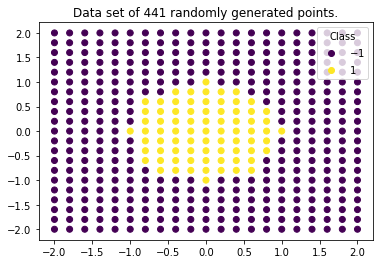

In [5]:
p = plt.scatter(complete_data[:, 0], complete_data[:, 1], c = complete_data[:, 2])
plt.legend(*p.legend_elements(prop = 'colors'), loc="best", title="Class")
plt.title("Data set of 441 randomly generated points.")

### Splitting into training and test data.

#### As mentioned in the question, we are going for 80/20 split.

In [6]:
train = complete_data[:353]
test = complete_data[353:]
print(len(complete_data), len(train), len(test), len(train) + len(test))

441 353 88 441


In [7]:
print(train[0])

[ 0.  -1.6 -1. ]


In [8]:
X_train = train[:, :2]
print(X_train.shape)
print(X_train[0])
y_train = train[:, 2:]
print(y_train.shape)
print(y_train[0])

(353, 2)
[ 0.  -1.6]
(353, 1)
[-1.]


In [10]:
X_test = test[:, :2]
print(X_test.shape)
print(X_test[0])
y_test = test[:, 2:]
print(y_test.shape)
print(y_test[0])

(88, 2)
[0.8 0.8]
(88, 1)
[-1.]


### Some important functions

#### Square of Euclidian Distance between two points.

In [11]:
def dist(x1, x2):
    return sum([(a - b) ** 2 for a, b in zip(x1, x2)])

#### Evaluating the Gaussian Function.

In [12]:
def gaussian(distance, sig):
    return math.exp((-1) * (distance) / ((2) * (sig ** 2)))

#### Evaluating the Gaussian Matrix.

In [14]:
def calculateG(data, centers, sig):
    g = np.zeros((len(data), len(centers)))
    for i in range(len(data)):
        for j in range(len(centers)):
            g[i][j] = gaussian(dist(data[i], centers[j]), sig)
    return g

#### Evaluating the Mean Square Error.

In [15]:
def mse(y_actual, y_prediction):
    err = 0
    for i in range(len(y_actual)):
        err = err + ((y_actual[i] - y_prediction[i]) ** 2)
    return (err / len(y_actual))

#### Evaluating the Accuracy.

In [16]:
def accuracy(actual, prediction):
    cnt = 0
    n = len(actual)
    if n == 0:
        return 0
    for i in range(n):
        if (actual[i] == 1 and prediction[i] >= 0) or (actual[i] == -1 and prediction[i] < 0):
            cnt = cnt + 1
    return (cnt / n)


#### Training RBF NN using closed form solution of W.

In [17]:
def function(data, centers, testt, sigma_list):
    e_train = list()
    e_test = list()
    a_train = list()
    a_test = list()
    print("Sigma \t Training Error  Test Error \t Train Accuracy \t Test Accurcy")
    for sig in sigma_list:
        G = calculateG(data, centers, sig)
        Ginv = np.linalg.pinv(G)
        # Calculating W using closed form.
        W = Ginv.dot(y_train)
        # Predicting on the training data.
        y_pred_train = G.dot(W)
        # Predicting on the test data.
        g = calculateG(testt, centers, sig)
        y_pred_test = g.dot(W)
        # Calculating errors and accuracy for both training and testing results.
        e_tr = mse(y_train, y_pred_train)
        e_te = mse(y_test, y_pred_test)
        a_tr = accuracy(y_train, y_pred_train)
        a_te = accuracy(y_test, y_pred_test)
        print(sig, "\t", e_tr , "\t", e_te, "\t", a_tr , "\t", a_te)
        e_train.append(e_tr)
        e_test.append(e_te)
        a_train.append(a_tr)
        a_test.append(a_te)
    return np.array(e_train), np.array(e_test), np.array(a_train), np.array(a_test)
    

#### Generating graph.

In [20]:
def plott(sig, trainn, testt, title):
    plt.plot(sig, trainn, 'b', label = "Train Accuracy")
    plt.plot(sig, testt, 'r', label = "Test Accuracy")
    plt.title(title)
    plt.xlabel("Spread Parameter (sigma)")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.show()

# 1) Using all the points in the Training Set as Centers

In [21]:
sigma = [0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.5, 0.75, 1, 2, 3, 4, 5, 7, 10, 12, 15, 20]

In [22]:
trainErr1, testErr1, trainAcc1, testAcc1 = function(X_train, X_train, X_test, sigma)

Sigma 	 Training Error  Test Error 	 Train Accuracy 	 Test Accurcy
0.01 	 [2.0033687e-30] 	 [1.] 	 1.0 	 0.9431818181818182
0.05 	 [4.41911555e-30] 	 [0.99823287] 	 1.0 	 0.9431818181818182
0.1 	 [3.67763797e-30] 	 [0.5004531] 	 1.0 	 0.9431818181818182
0.2 	 [1.51979996e-28] 	 [0.23607516] 	 1.0 	 0.9090909090909091
0.25 	 [2.11727471e-26] 	 [0.41277765] 	 1.0 	 0.8977272727272727
0.3 	 [1.45300734e-23] 	 [0.71358233] 	 1.0 	 0.8636363636363636
0.5 	 [6.74767111e-09] 	 [263.0948803] 	 1.0 	 0.6704545454545454
0.75 	 [0.0188586] 	 [35.8592505] 	 1.0 	 0.8522727272727273
1 	 [0.03817] 	 [0.92241261] 	 0.9971671388101983 	 0.9431818181818182
2 	 [0.06814759] 	 [0.25542449] 	 0.9858356940509915 	 0.9772727272727273
3 	 [0.09712904] 	 [0.14861839] 	 0.9830028328611898 	 0.9659090909090909
4 	 [0.1052147] 	 [0.12946171] 	 0.9858356940509915 	 0.9772727272727273
5 	 [0.10921752] 	 [0.11862279] 	 0.9801699716713881 	 0.9886363636363636
7 	 [0.11692465] 	 [0.14186586] 	 0.9801699716713881 	 0.

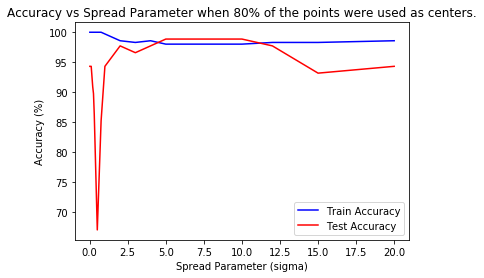

In [25]:
plott(sigma, trainAcc1 * 100, testAcc1 * 100, 
      "Accuracy vs Spread Parameter when 80% of the points were used as centers.")

Sigma = 5 is selected for succeeding analysis. Reasoning for this is given in the report below.

# 2a) Using randomly 150 points from the dataset.

In [26]:
np.random.seed(2)
centers = np.copy(train)
np.random.shuffle(centers)
centers_shuffled = centers[:150]
print(centers.shape, centers_shuffled.shape)

(353, 3) (150, 3)


In [27]:
X_ran = centers_shuffled[:, :2]
y_ran = centers_shuffled[:, 2:]
print(X_ran.shape, y_ran.shape)

(150, 2) (150, 1)


In [28]:
trainErr2, testErr2, trainAcc2, testAcc2 = function(X_train, X_ran, X_test, [5])

Sigma 	 Training Error  Test Error 	 Train Accuracy 	 Test Accurcy
5 	 [0.10924164] 	 [0.1186642] 	 0.9801699716713881 	 0.9886363636363636


# 2b) Using KMeans clustering to get 150 centroids.

In [30]:
clf = KMeans(n_clusters = 150, random_state = 42)
clf.fit(X_train)
X_cent = clf.cluster_centers_
X_cent.shape

(150, 2)

In [31]:
trainErr3, testErr3, trainAcc3, testAcc3 = function(X_train, X_cent, X_test, [5])

Sigma 	 Training Error  Test Error 	 Train Accuracy 	 Test Accurcy
5 	 [0.10919882] 	 [0.11862793] 	 0.9801699716713881 	 0.9886363636363636


# Report

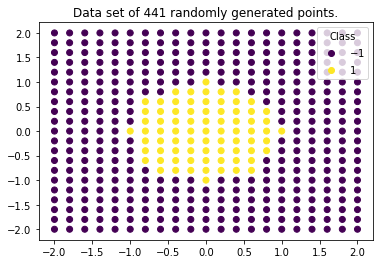

In [32]:
p = plt.scatter(complete_data[:, 0], complete_data[:, 1], c = complete_data[:, 2])
plt.legend(*p.legend_elements(prop = 'colors'), loc="best", title="Class")
plt.title("Data set of 441 randomly generated points.")
plt.show()

## 1) When 80% of the points were used as centers:

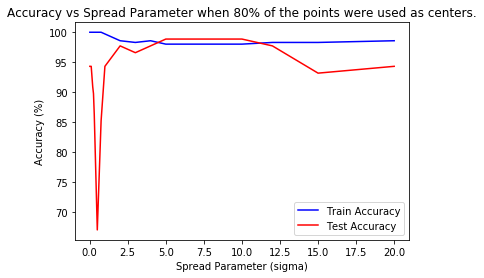

In [34]:
plott(sigma, trainAcc1 * 100, testAcc1 * 100, 
      "Accuracy vs Spread Parameter when 80% of the points were used as centers.")

We varied our sigma over the following values: 0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.5, 0.75, 1, 2, 3, 4, 5, 7, 10, 12, 15, and 20.

#### From the above graph and results, considering Accuracy as a parameter for performance, we observe the following:

1) When the spread parameter(sigma) is of very low value, we have a very high training accuracy (approx. 100%). This can be explained as follows. We have 353 (~80%) of the points as centers, and the data also contains the same points. When sigma is low, there will be very little to no overlap between the Gaussian Kernel functions amongst different centers. And since, the data also contains the same points which are centers, we are able to determine with very high accuracy whether the training data point lies inside or outside of the circle.

We are calculating Weights based on this situation. The weights thus calculated will be very skewed to the training data, and hence we will have overfitting. Due to this overfitting, we see that for small values of sigma, the Test accuracy is not high.

2) As we increase the value of spread parameter, the kernel function becomes less sensitive to the data point being close to its center. Due to this, as we increase the value of sigma, the network seems to generalize. So even though there is a little decrease in training accuracy, the test accuracy increases, and is maximum for sigma values of 5, 7 and 10.

3) If we keep on increasing the value of spread parameter, it will lead to overlap in the kernel functions of different centers. Due to this, we see that for values of sigma towards the higher end, the test accuracy again dips.

In [35]:
a1, a2, a3, a4 = function(X_train, X_train, X_test, [5])

Sigma 	 Training Error  Test Error 	 Train Accuracy 	 Test Accurcy
5 	 [0.10921752] 	 [0.11862279] 	 0.9801699716713881 	 0.9886363636363636


Hence, we choose a value of spread parameter sigma that is neither too high, nor too low. We thus choose sigma as 5 for further considerations.

## 2a) Randomly selecting 150 centers from the data.

In [36]:
a1, a2, a3, a4 = function(X_train, X_ran, X_test, [5])

Sigma 	 Training Error  Test Error 	 Train Accuracy 	 Test Accurcy
5 	 [0.10924164] 	 [0.1186642] 	 0.9801699716713881 	 0.9886363636363636


We observe a similar performance as in part 1). This can be explained as since our data is small and condensed, it is possible that the 150 points chosen randomly contain sufficient information to define boundary between the two regions to the same degree as done by 353 data points in part 1). Due to this, we are getting similar performance as in part 1) for the chosen value of sigma.

## 2b) Finding 150 centers using KMeans.

In [38]:
a1, a2, a3, a4 = function(X_train, X_cent, X_test, [5])

Sigma 	 Training Error  Test Error 	 Train Accuracy 	 Test Accurcy
5 	 [0.10919882] 	 [0.11862793] 	 0.9801699716713881 	 0.9886363636363636


We observe a similar performance as in part 1). This can be explained as since our data is very small and condensed, the 150 center points calculated using KMeans are able to define the boundary between the two regions to the same degree as done by 353 data points in part 1). Hence, we are observing a similar performance as in part 1) for the chosen value of sigma.

It is also possible that even fewer number points than 150 contain enough information to define the boundary between the two regions, but this is outside the scope of this analysis.